<a href="https://colab.research.google.com/github/diogobrasil/analises-tcc-cripto/blob/main/notebooks/dados-mono-icaro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando os Dados utilizados na monográfia de Ícaro Moura**

## **1. Instale a biblioteca necessária**
Use a biblioteca ```yfinance``` para acessar dados financeiros. Instale-a se ainda não estiver instalada:

In [ ]:
#!pip install yfinance

## **2. Baixe os dados históricos**
A biblioteca ```yfinance``` permite baixar os dados diretamente. Você pode fazer isso usando o método download.

In [ ]:
import yfinance as yf
import pandas as pd

# Lista de ações
acoes = ['ITUB4.SA', 'BBAS3.SA', 'CYRE3.SA', 'TEND3.SA', 'DIRR3.SA',
         'ELET3.SA', 'EQTL3.SA', 'CMIG4.SA', 'PETR3.SA', 'VALE3.SA', 'BRAP3.SA']

# Período dos dados
inicio = "2010-01-01"
fim = "2022-09-30"

# Loop para baixar cada ação separadamente
for acao in acoes:
    print(f"Baixando dados de {acao}...")
    dados = yf.download(acao, start=inicio, end=fim)

    # Salvando em arquivos CSV separados
    nome_arquivo = f"{acao.replace('.SA', '')}_dados.csv"
    dados.to_csv(nome_arquivo)
    print(f"Dados de {acao} salvos como {nome_arquivo}")


Baixando dados de ITUB4.SA...


[*********************100%***********************]  1 of 1 completed


Dados de ITUB4.SA salvos como ITUB4_dados.csv
Baixando dados de BBAS3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de BBAS3.SA salvos como BBAS3_dados.csv
Baixando dados de CYRE3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de CYRE3.SA salvos como CYRE3_dados.csv
Baixando dados de TEND3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de TEND3.SA salvos como TEND3_dados.csv
Baixando dados de DIRR3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de DIRR3.SA salvos como DIRR3_dados.csv
Baixando dados de ELET3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de ELET3.SA salvos como ELET3_dados.csv
Baixando dados de EQTL3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de EQTL3.SA salvos como EQTL3_dados.csv
Baixando dados de CMIG4.SA...


[*********************100%***********************]  1 of 1 completed


Dados de CMIG4.SA salvos como CMIG4_dados.csv
Baixando dados de PETR3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de PETR3.SA salvos como PETR3_dados.csv
Baixando dados de VALE3.SA...


[*********************100%***********************]  1 of 1 completed


Dados de VALE3.SA salvos como VALE3_dados.csv
Baixando dados de BRAP3.SA...


[*********************100%***********************]  1 of 1 completed

Dados de BRAP3.SA salvos como BRAP3_dados.csv


## **3. Estrutura dos dados**
O `yfinance` retorna os dados em formato de DataFrame, com as seguintes colunas:
- **Open**: Preço de abertura
- **High**: Maior preço do dia
- **Low**: Menor preço do dia
- **Close**: Preço de fechamento
- **Adj Close**: Preço ajustado para splits e dividendos
- **Volume**: Volume negociado

Os índices serão as datas correspondentes aos preços.



In [ ]:
dataframe_temporario = pd.read_csv('ITUB4_dados.csv')
dataframe_temporario.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,10.517972946166992,18.268333435058594,18.436809539794922,17.708261489868164,17.708261489868164,11843397
3,2010-01-05,10.586126327514648,18.386722564697266,18.386722564697266,18.16815757751465,18.313867568969727,8593315
4,2010-01-06,10.49437427520752,18.227352142333984,18.436809539794922,18.077089309692383,18.327526092529297,10602572


In [ ]:
dataframe_temporario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      3165 non-null   object
 1   Adj Close  3164 non-null   object
 2   Close      3164 non-null   object
 3   High       3164 non-null   object
 4   Low        3164 non-null   object
 5   Open       3164 non-null   object
 6   Volume     3164 non-null   object
dtypes: object(7)
memory usage: 173.2+ KB


## **4. Pré-Processamento**

- Remover linhas indesejadas: Excluir a linha com o "Ticker" e qualquer linha não relacionada aos dados.
- Corrigir os índices: Configurar a coluna Date como índice do DataFrame.
- Tratar os dados: Verificar se há valores nulos ou inconsistências e ajustá-los.
- Confirmar o formato: Certificar que as colunas estejam no formato correto (e.g., datas como índices e valores numéricos no restante).

In [ ]:
# Lista com código das ações
ls_acoes = ['ITUB4','BBAS3', 'CYRE3', 'TEND3', 'DIRR3', 'ELET3', 'EQTL3', 'CMIG4', 'PETR3', 'VALE3', 'BRAP3']

# Dicionário que irá conter os dataframes das ações
dict_dataframes = {}

for acao in ls_acoes:
  # Salvando os dados no dataframe
  dict_dataframes[acao] = pd.read_csv(f'{acao}_dados.csv')

  # Removendo linhas desnecessárias
  dict_dataframes[acao].drop([0, 1], inplace=True)

  # Renomear as colunas para refletirem os nomes corretos
  dict_dataframes[acao].columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

  # Convertendo a coluna 'Date' para valor numerico e definindo como índice
  dict_dataframes[acao]['Date'] = pd.to_datetime(dict_dataframes[acao]['Date'], errors='coerce')
  dict_dataframes[acao].set_index('Date', inplace=True)

  # Converter colunas numéricas para o tipo float
  for col in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']:
      dict_dataframes[acao][col] = pd.to_numeric(dict_dataframes[acao][col], errors='coerce')


In [ ]:
dict_dataframes['ITUB4'].head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,10.517973,18.268333,18.436810,17.708261,17.708261,11843397
2010-01-05,10.586126,18.386723,18.386723,18.168158,18.313868,8593315
2010-01-06,10.494374,18.227352,18.436810,18.077089,18.327526,10602572
2010-01-07,10.386891,18.040663,18.236460,18.008787,18.099855,9966567
2010-01-08,10.229588,17.767456,18.113516,17.721922,18.113516,9748709


- Remoção de linhas extras: As duas primeiras linhas desnecessárias foram excluídas. A linha com "Ticker" foi eliminada.
- Configuração de índice: A coluna Date foi convertida para o formato de data e definida como índice.
- Conversão de colunas: As colunas numéricas (Adj Close, Close, High, Low, Open, Volume) foram convertidas para o tipo float.

Não há valores nulos nos dados, o que indica que todas as colunas estão completas e prontas para análise.

In [ ]:
dict_dataframes['ITUB4'].isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


## **5. Panoroma geral**
- Obter um panorama geral dos dados (número de linhas, colunas, tipos de variáveis).

In [ ]:
dict_dataframes['ITUB4'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3163 entries, 2010-01-04 to 2022-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3163 non-null   float64
 1   Close      3163 non-null   float64
 2   High       3163 non-null   float64
 3   Low        3163 non-null   float64
 4   Open       3163 non-null   float64
 5   Volume     3163 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.0 KB


- 3163 linhas
- 6 colunas (Adj Close, Close, High, Low, Open, Volume)
- Todos os dados são numéricos
- Como já sabemos, estamos analisando dados entre janeiro de 2010 à setembro de 2022


In [ ]:
dict_dataframes['ITUB4'].describe()

,Adj Close,Close,High,Low,Open,Volume
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3.163000e+03
mean,16.484197,22.464296,22.753332,22.173816,22.469475,2.341332e+07
std,6.754610,6.898523,6.981528,6.825804,6.906858,1.361253e+07
min,6.875356,11.633995,12.066571,11.451858,11.884434,0.000000e+00
25%,10.044138,16.454932,16.653007,16.226123,16.458347,1.439789e+07
50%,14.164291,20.666666,20.914600,20.363636,20.716253,2.039388e+07
75%,22.329094,27.610001,27.991667,27.299999,27.610001,2.918078e+07
max,30.900854,39.689999,39.790001,38.400002,38.669998,1.606699e+08


Aqui temos outras informações como media, mínimo, máximo e desvio padrão.

## **6. Visualização dos Dados brutos**
- Criar gráficos básicos (como série temporal do preço, volume) para observar tendências gerais.

- Identificar sazonalidades, padrões ou outliers.

In [ ]:
# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

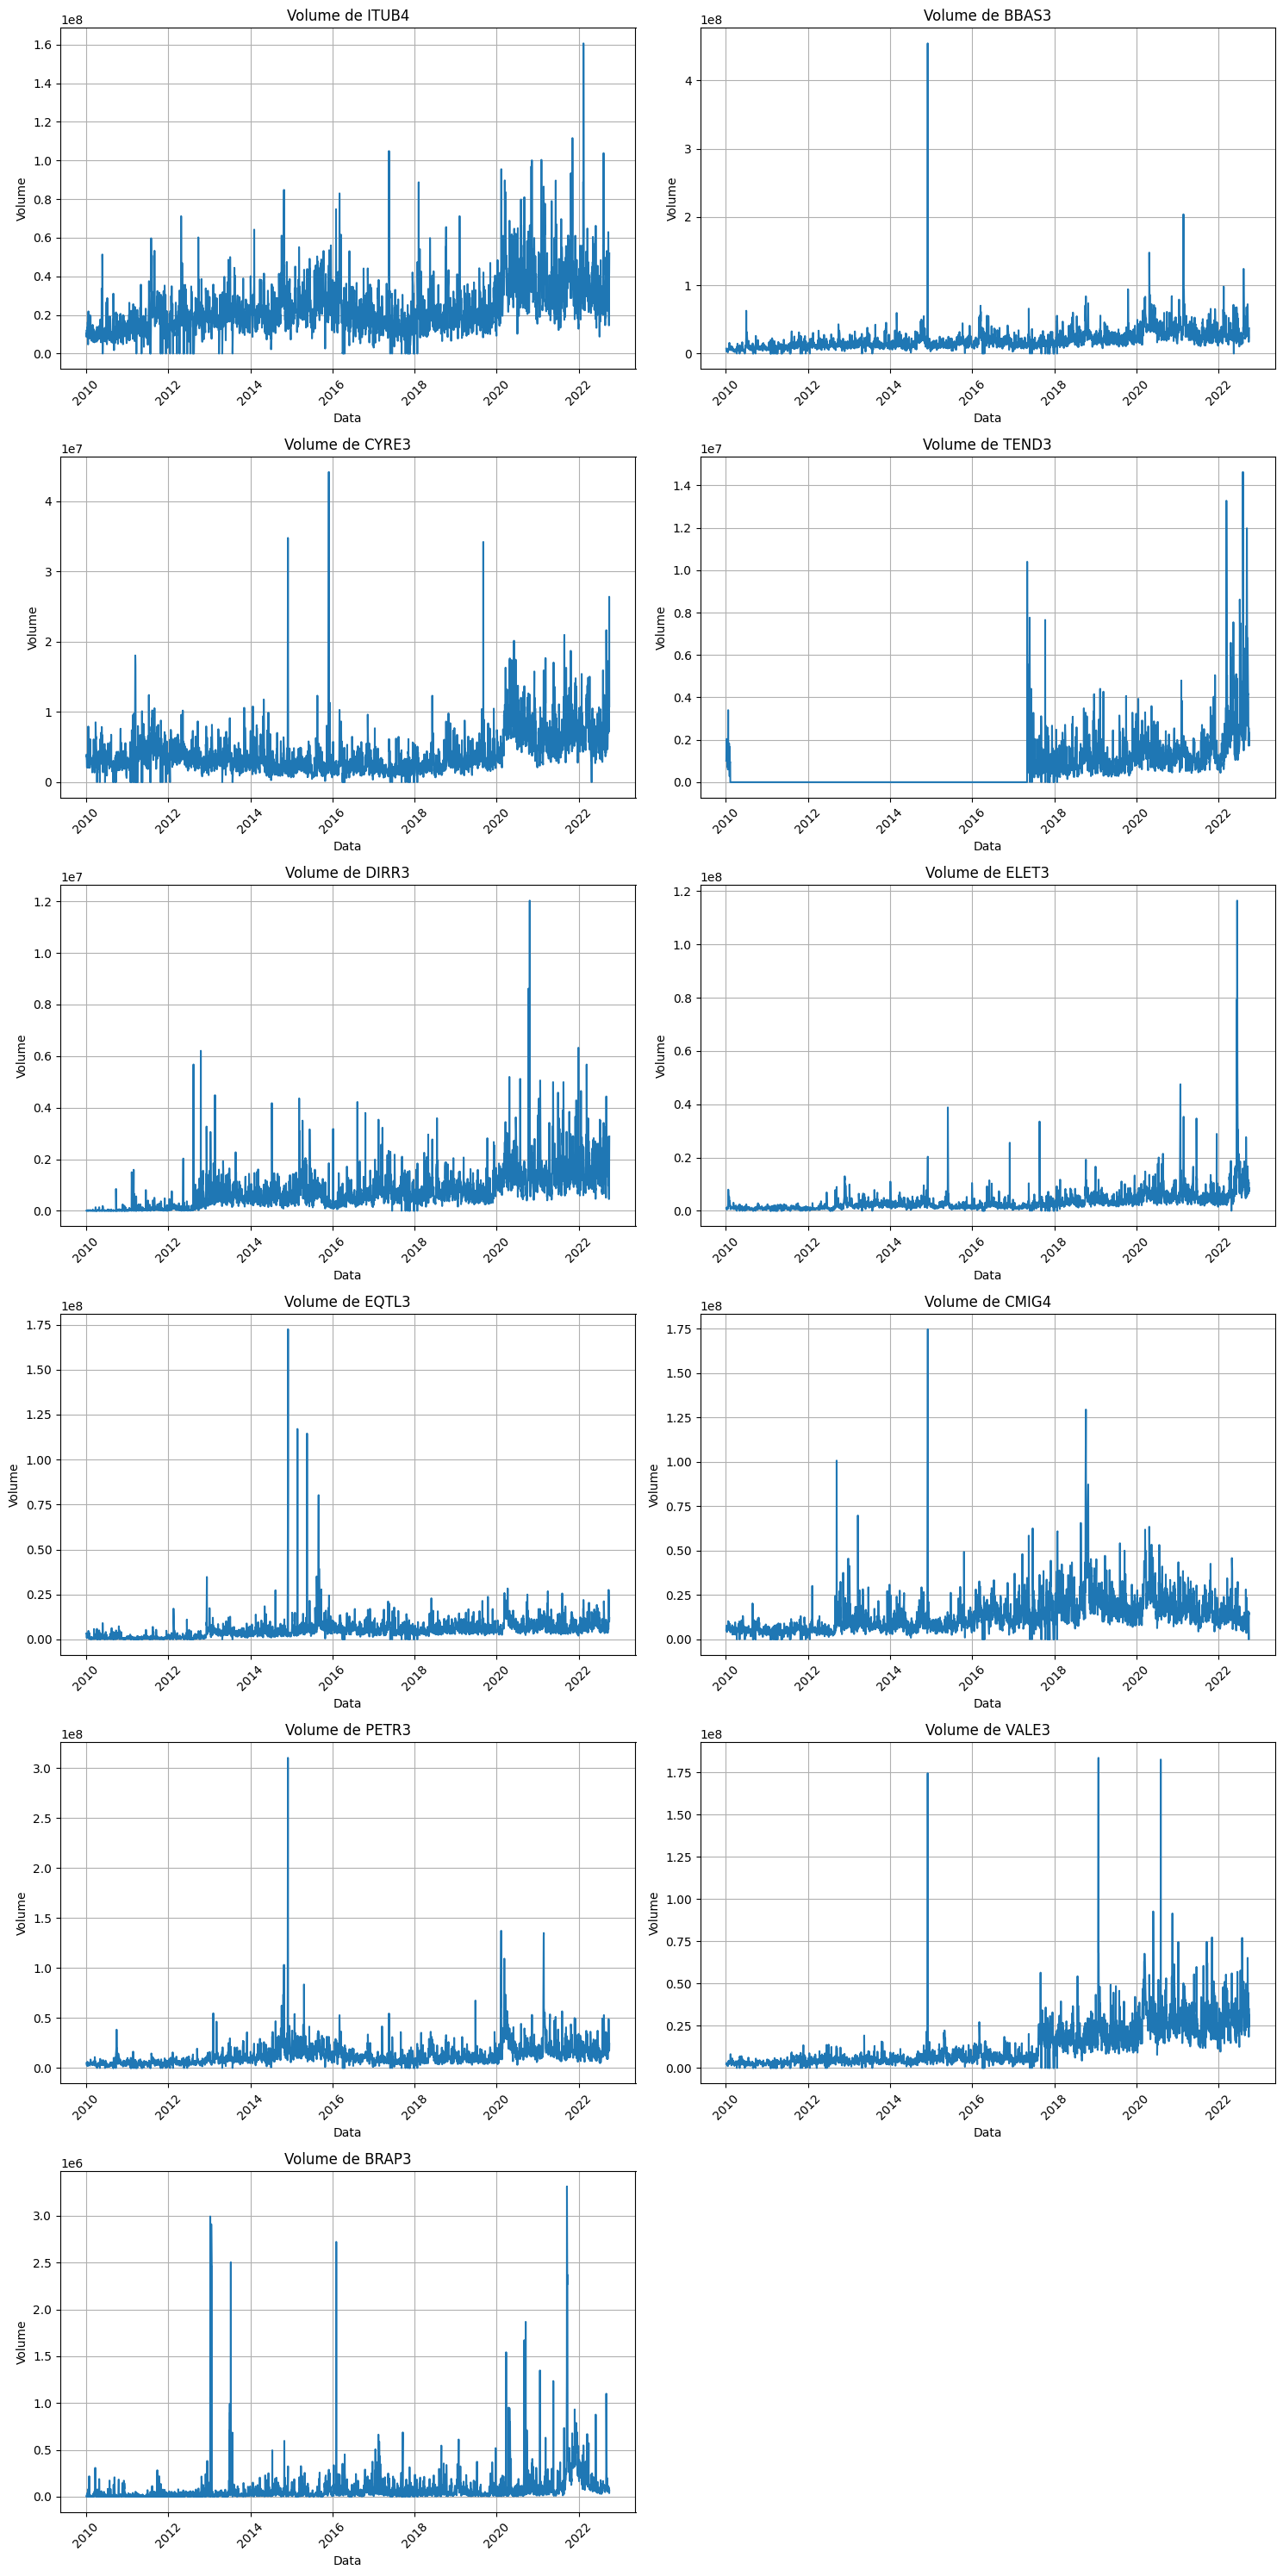

In [ ]:
# Plotar o volume de cada ação
plt.figure(figsize=(15, 30))  # Ajuste o tamanho da figura conforme necessário

for i, acao in enumerate(ls_acoes):
    plt.subplot(6, 2, i + 1)  # Cria subplots para cada ação
    plt.plot(dict_dataframes[acao]['Volume'])
    plt.title(f'Volume de {acao}')
    plt.xlabel('Data')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Visulizar o valores do Volume da ação ITUB4 durante a pandemia

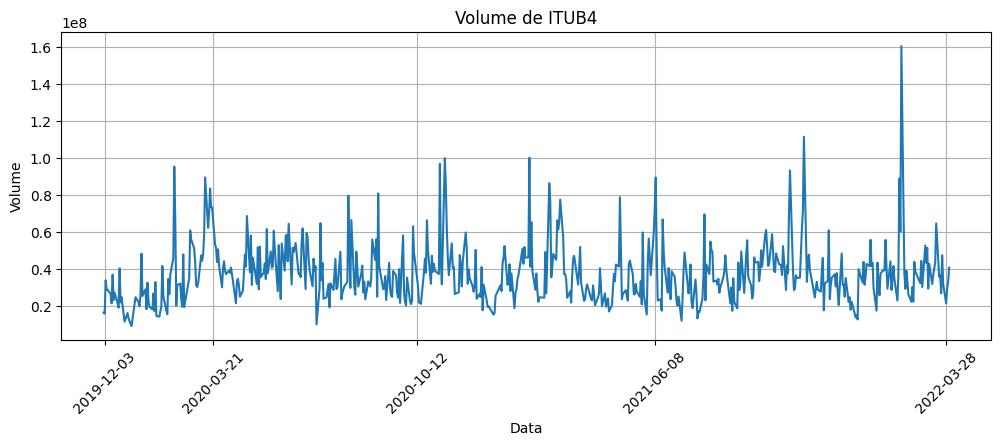

In [ ]:
# Visualização do volume da ITUB4
fig, ax = plt.subplots(figsize=(12, 4))

data_filtrada = dict_dataframes['ITUB4']['2019-12-01':'2022-03-31']

ax.plot(data_filtrada['Volume'])
ax.set_title('Volume de ITUB4')
ax.set_xlabel('Data')
ax.set_ylabel('Volume')
ax.grid(True)

plt.xticks(ticks=['2019-12-03', '2020-03-21', '2020-10-12', '2021-06-08', '2022-03-28'], rotation=45)
plt.show()


### Nas células a cima podemos visualizar o Volume de cada ação. Abaixo, veremos a os valores de Abertura e Fechamento de cada uma :

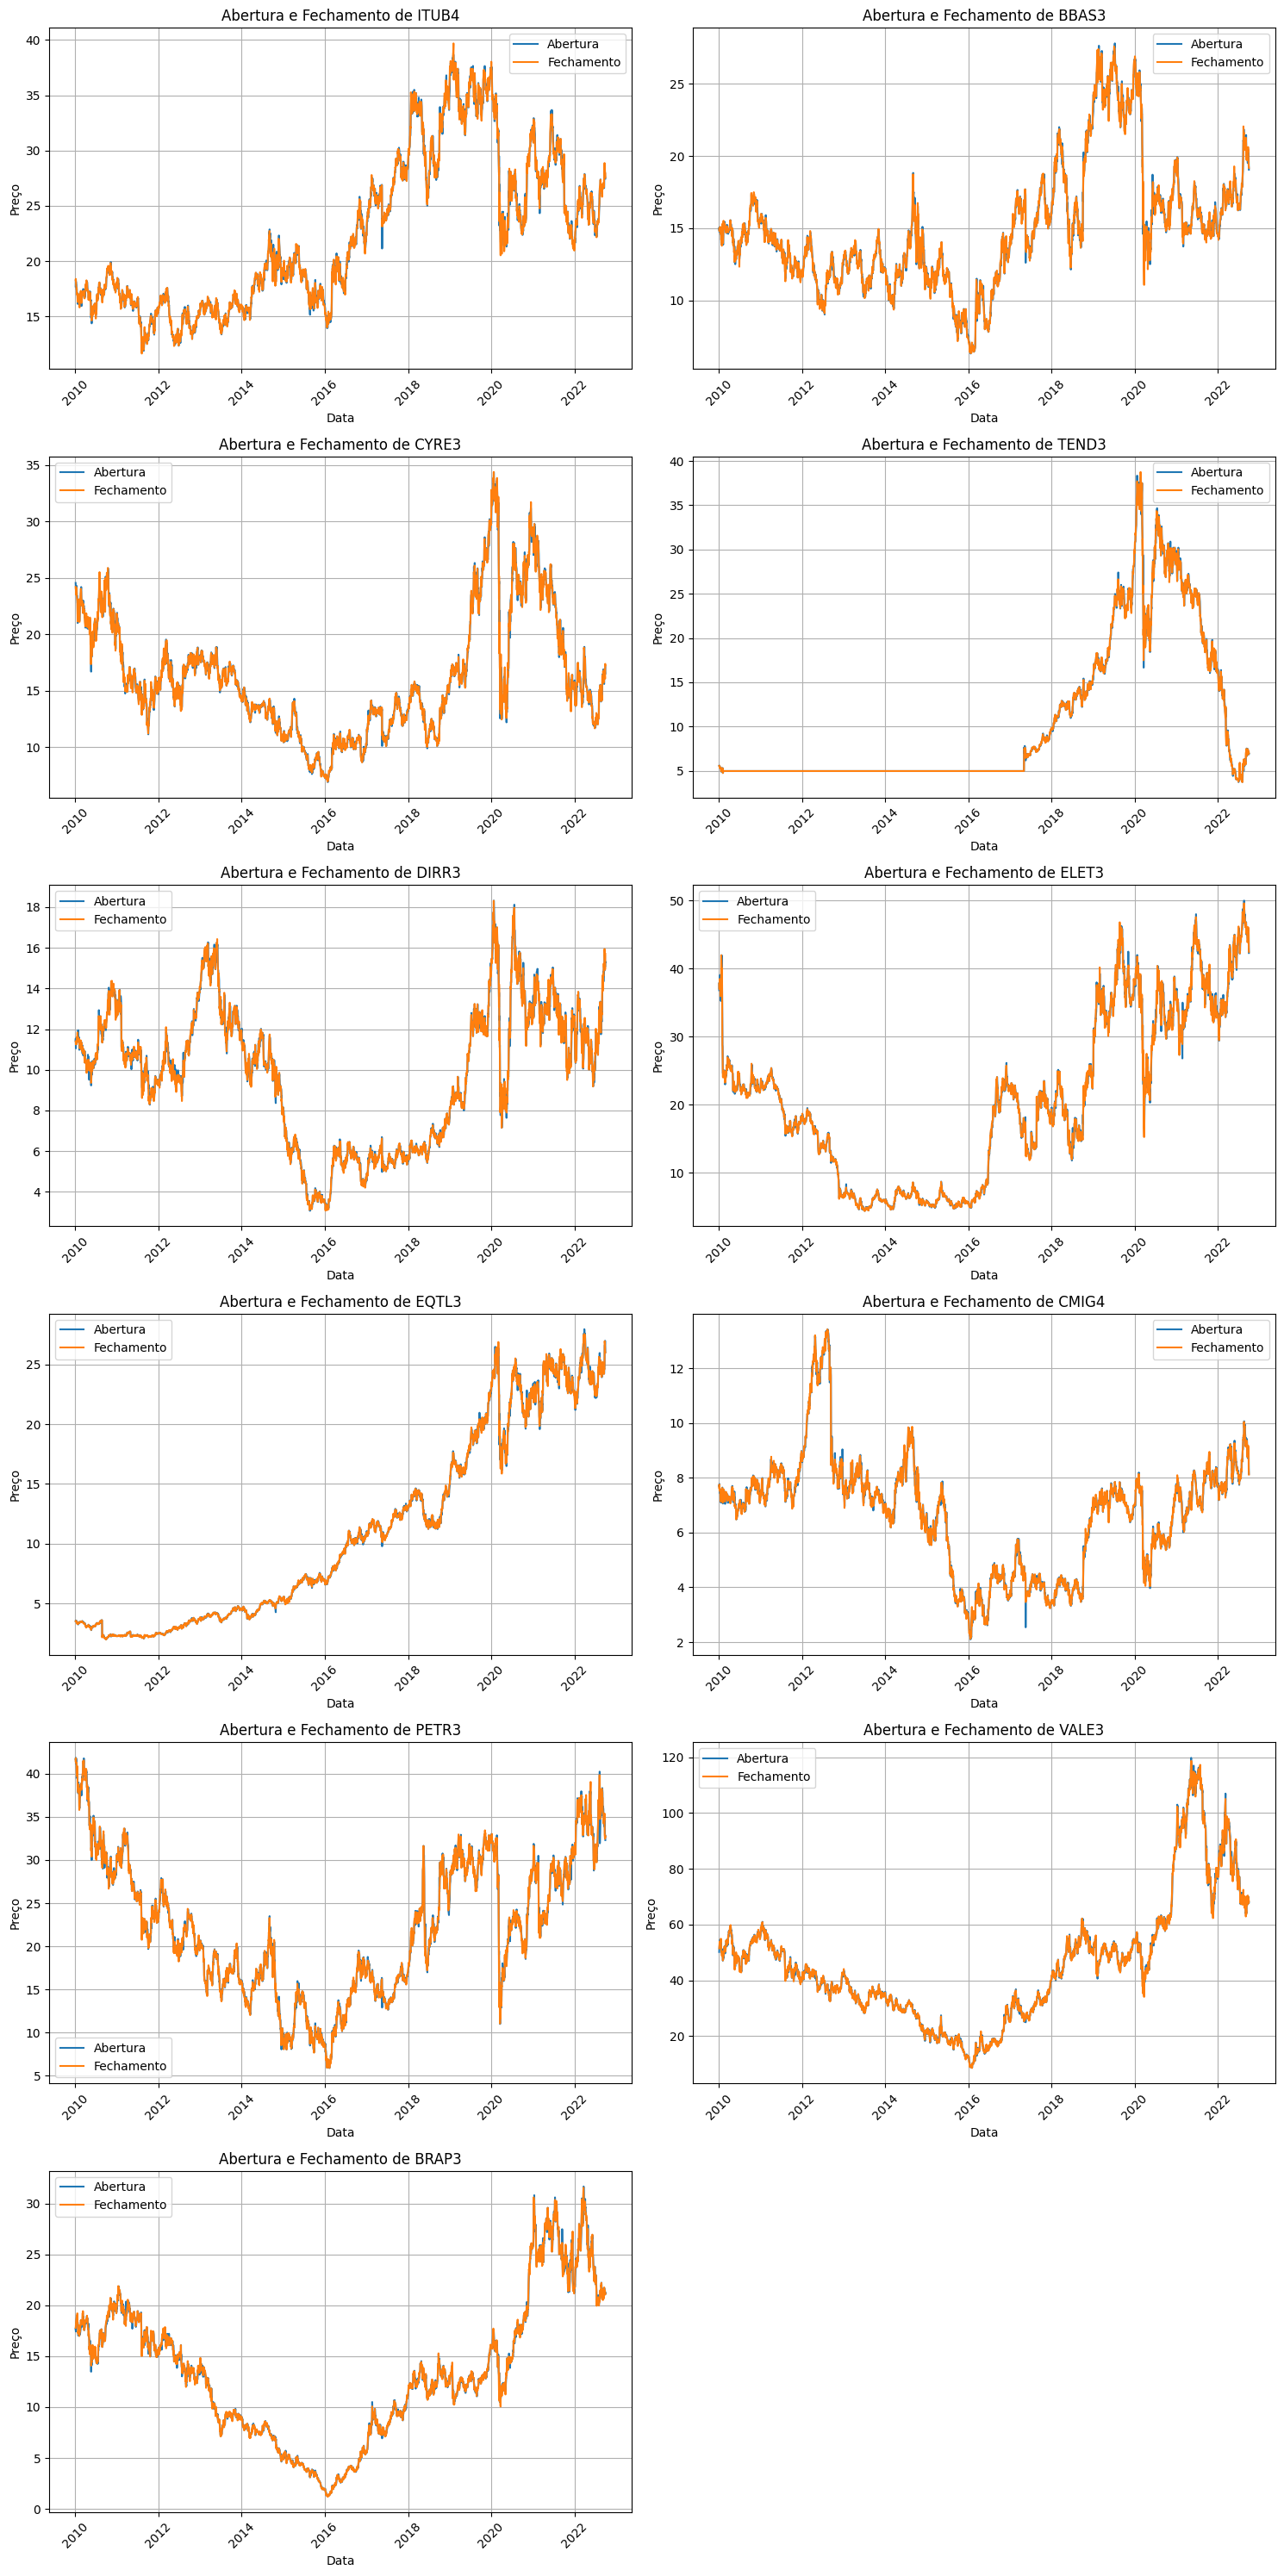

In [ ]:
# Plotar o preço de abertura e fechamento de cada ação
plt.figure(figsize=(15, 30))  # Ajuste o tamanho da figura conforme necessário

for i, acao in enumerate(ls_acoes):
    plt.subplot(6, 2, i + 1)  # Cria subplots para cada ação
    plt.plot(dict_dataframes[acao]['Open'], label='Abertura')
    plt.plot(dict_dataframes[acao]['Close'], label='Fechamento')
    plt.title(f'Abertura e Fechamento de {acao}')
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Vamos visulizar os valores de Abertura (Open) e fechamento (Close) entre janeiro de 2019 e final de março de 2022.

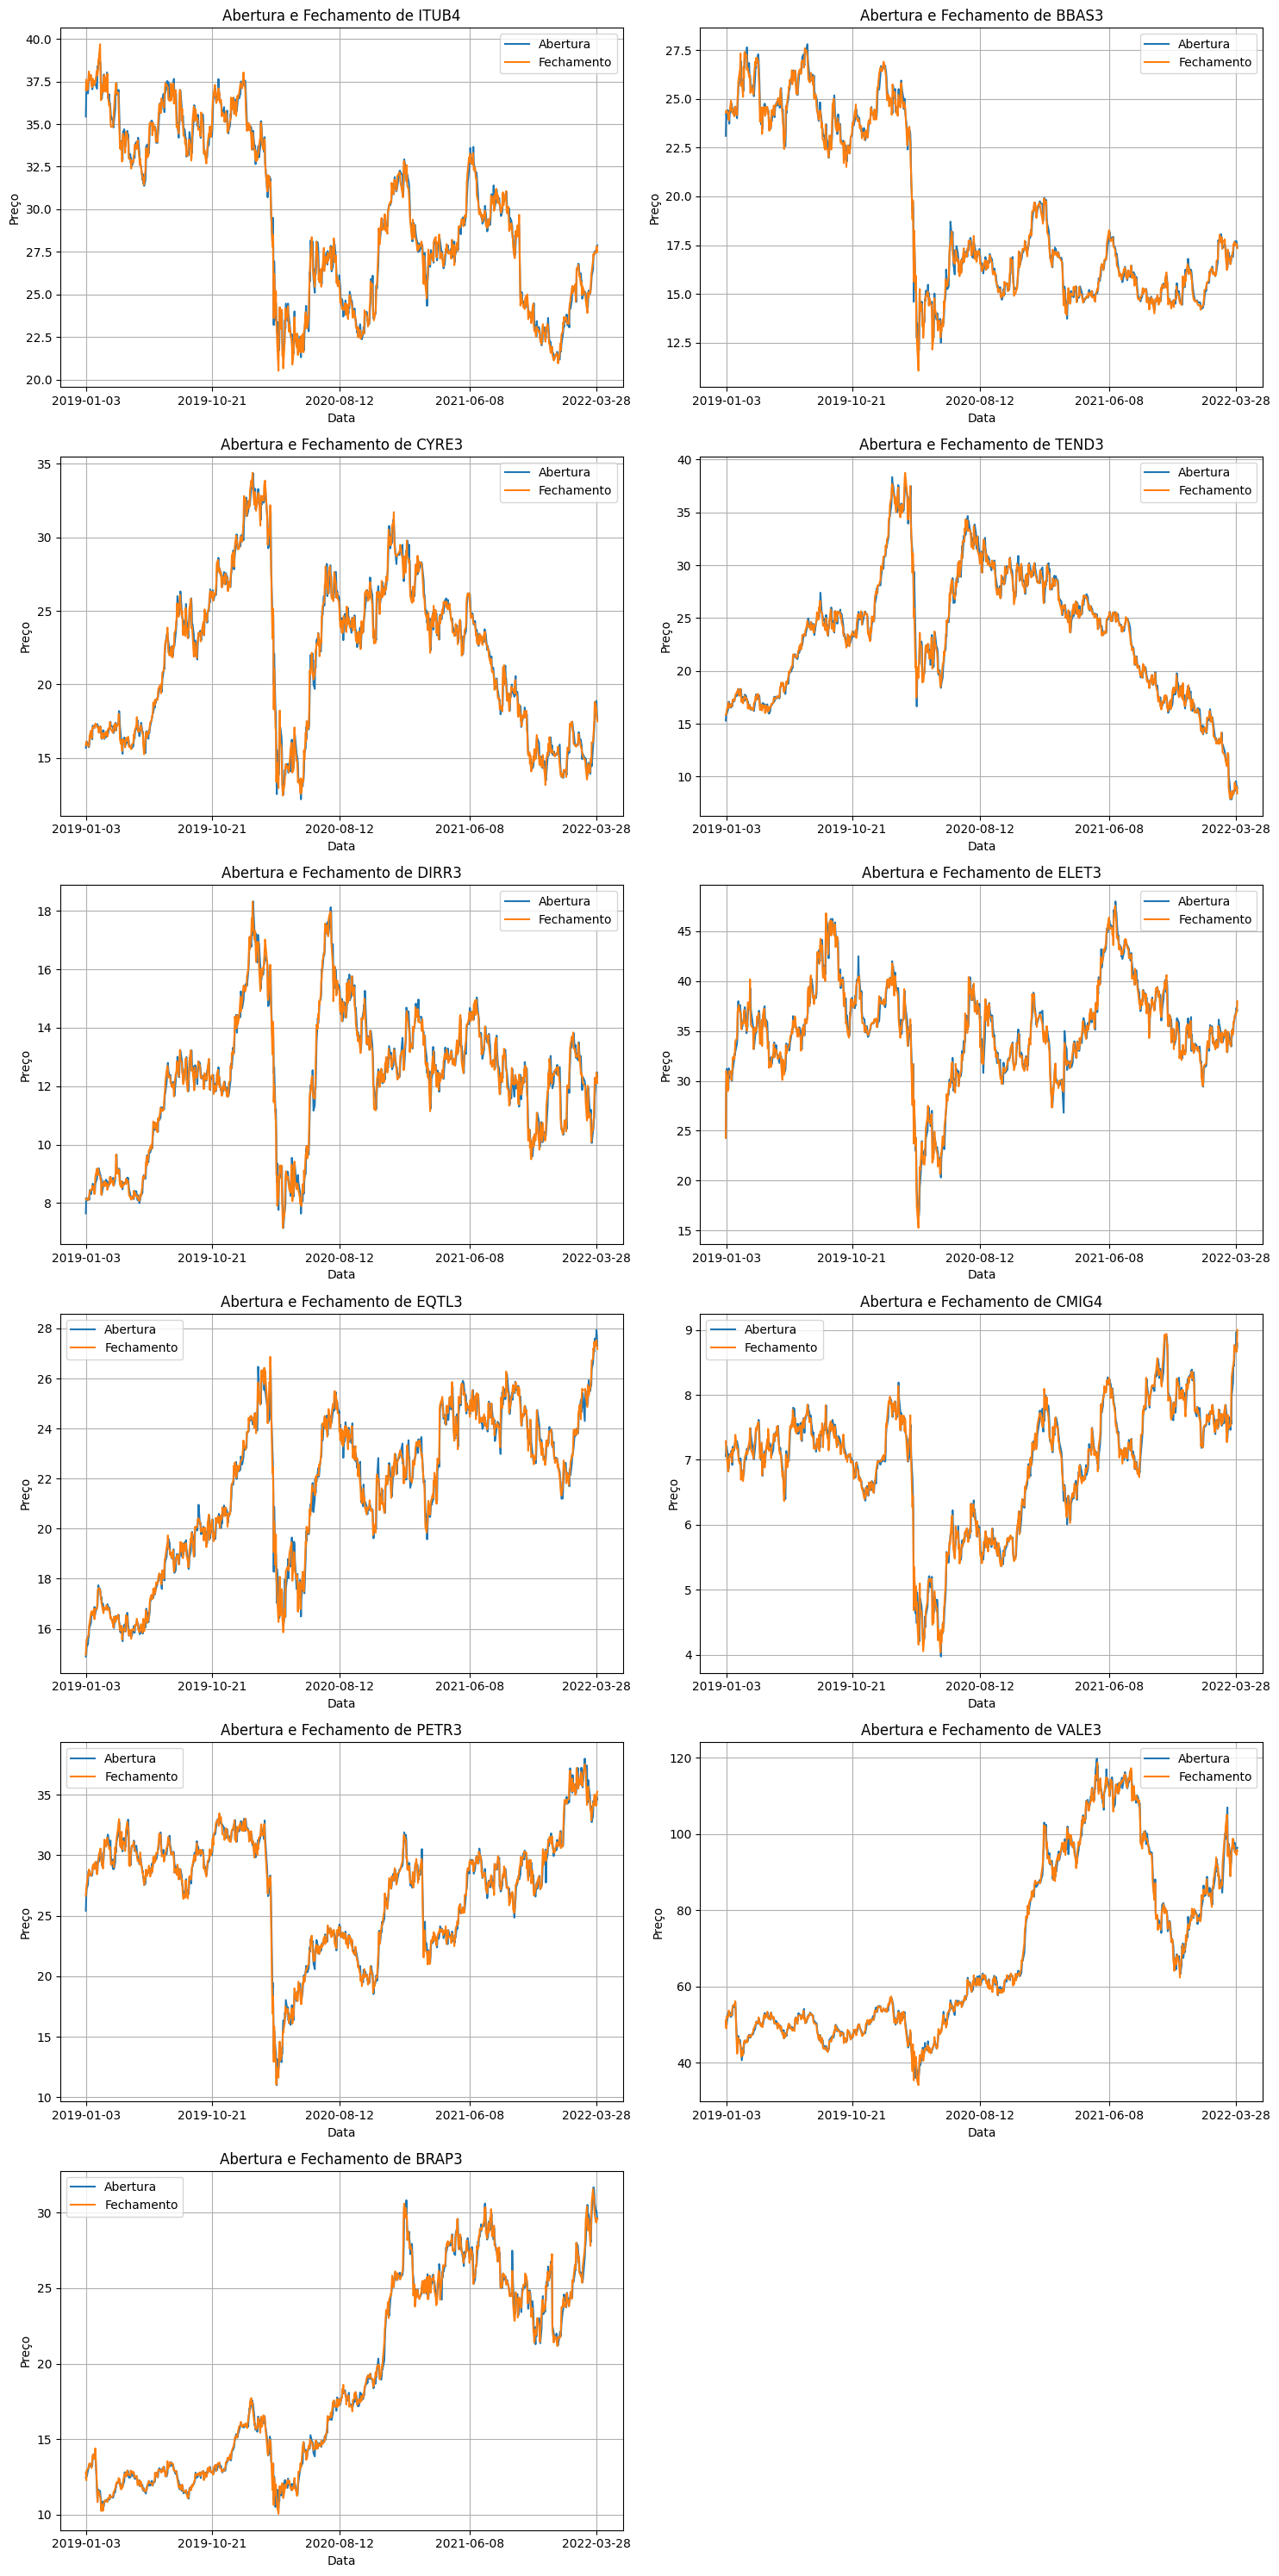

In [ ]:
# Plotar o preço de abertura e fechamento de cada ação a partir de janeiro de 2019 a março de 2022
plt.figure(figsize=(15, 30))  # Ajuste o tamanho da figura conforme necessário

for i, acao in enumerate(ls_acoes):
    # Filtrar dados a partir de janeiro de 2019 a março de 2022
    data_filtrada = dict_dataframes[acao]['2019-01-01':'2022-03-31']

    plt.subplot(6, 2, i + 1)  # Cria subplots para cada ação
    plt.plot(data_filtrada['Open'], label='Abertura')
    plt.plot(data_filtrada['Close'], label='Fechamento')
    plt.title(f'Abertura e Fechamento de {acao}')
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=['2019-01-03', '2019-10-21', '2020-08-12', '2021-06-08', '2022-03-28'])

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Fazendo um recorte ainda menor, tentando analisar o comportamento no pico da pandemia

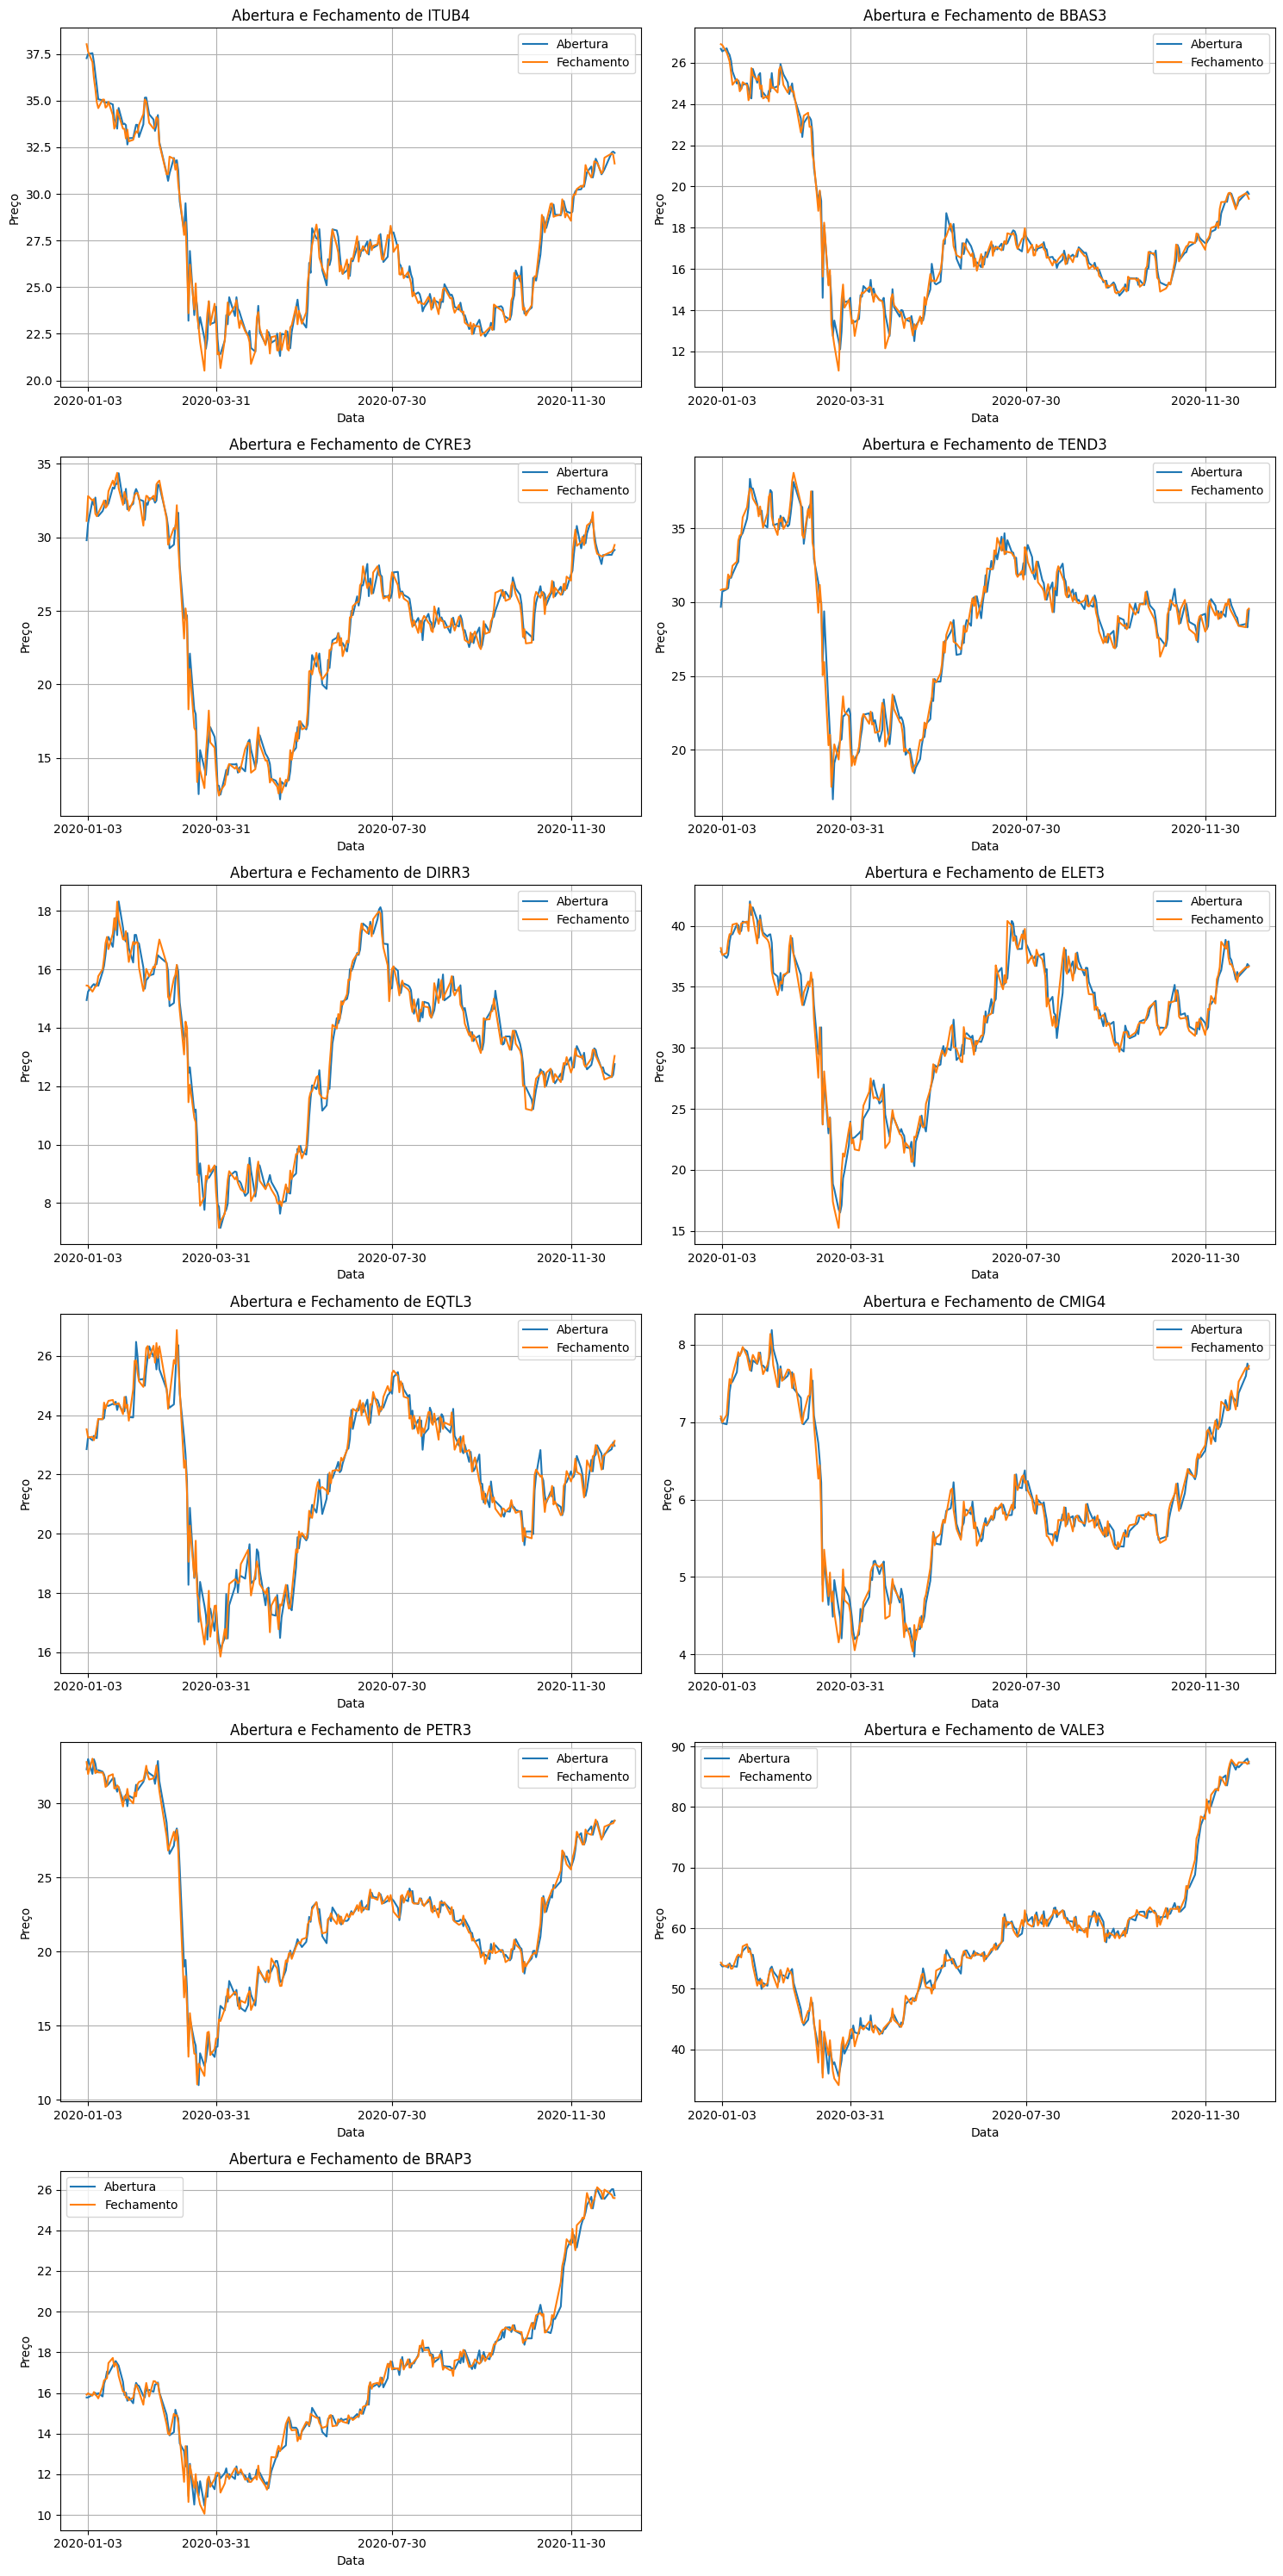

In [ ]:
# Plotar o preço de abertura e fechamento de cada ação em 2020
plt.figure(figsize=(15, 30))  # Ajuste o tamanho da figura conforme necessário

for i, acao in enumerate(ls_acoes):
    # Filtrar dados a partir de janeiro de 2020
    data_filtrada = dict_dataframes[acao]['2020-01-01':'2020-12-31']

    plt.subplot(6, 2, i + 1)  # Cria subplots para cada ação
    plt.plot(data_filtrada['Open'], label='Abertura')
    plt.plot(data_filtrada['Close'], label='Fechamento')
    plt.title(f'Abertura e Fechamento de {acao}')
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=['2020-01-03', '2020-03-31', '2020-07-30', '2020-11-30'])

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Pegando apenas uma ação (ITUB4)

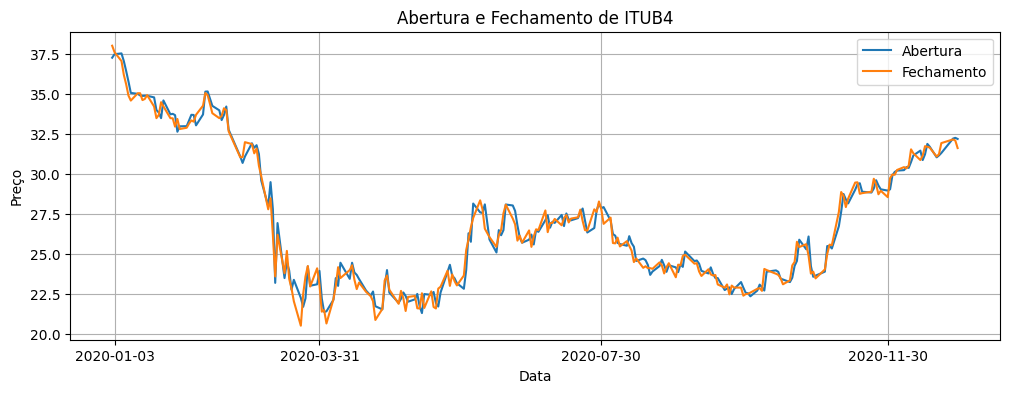

In [ ]:
# Visualização do volume da ITUB4
fig, ax = plt.subplots(figsize=(12, 4))

# Filtrar dados a partir de janeiro de 2020
data_filtrada = dict_dataframes['ITUB4']['2020-01-01':'2020-12-31']

ax.plot(data_filtrada['Open'], label='Abertura')
ax.plot(data_filtrada['Close'], label='Fechamento')
ax.set_title(f'Abertura e Fechamento de ITUB4')
ax.set_xlabel('Data')
ax.set_ylabel('Preço')
ax.legend()
ax.grid(True)
ax.set_xticks(ticks=['2020-01-03', '2020-03-31', '2020-07-30', '2020-11-30'])

plt.show()